In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.linalg as la
sns.set(style='whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pd.options.display.float_format = '{:.2f}'.format    # pandas: para todos os números aparecerem com duas casas decimais
np.set_printoptions(precision=2, suppress=True)      # numpy: para todos os números aparecerem com duas casas decimais

In [ ]:
dados = pd.read_csv('https://patriciasiqueira.github.io/arquivos/prod-animal-2016.csv', index_col='estado')

In [ ]:
dados.head()

,leite,ovos,mel
estado,,,
Rondônia,790947,17204,89981
Acre,56870,4647,4752
Amazonas,45978,51313,33310
Roraima,13141,4572,142800
Pará,577522,32596,523999


In [ ]:
dados.shape

(27, 3)

In [ ]:
dados['leite'].mean()

np.float64(1245357.4444444445)

In [ ]:
dados.corr()

,leite,ovos,mel
leite,1.00,0.49,0.76
ovos,0.49,1.00,0.57
mel,0.76,0.57,1.00


In [ ]:
X = dados
pca = PCA(random_state=1)
resultado_pca = pca.fit_transform(scale(X))   # scale(X) padroniza os dados, como se usássemos a matriz R
resultado = pd.DataFrame({'cp1':resultado_pca[:, 0], 'cp2':resultado_pca[:, 1]}, index=X.index)

In [ ]:
pca.components_

array([[ 0.59,  0.52,  0.61],
       [-0.47,  0.84, -0.26],
       [-0.65, -0.14,  0.75]])

In [9]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 73.78,  92.1 , 100.  ])

In [10]:
# variâncias dos CPs (autovalores)
pca.explained_variance_

array([2.3 , 0.57, 0.25])

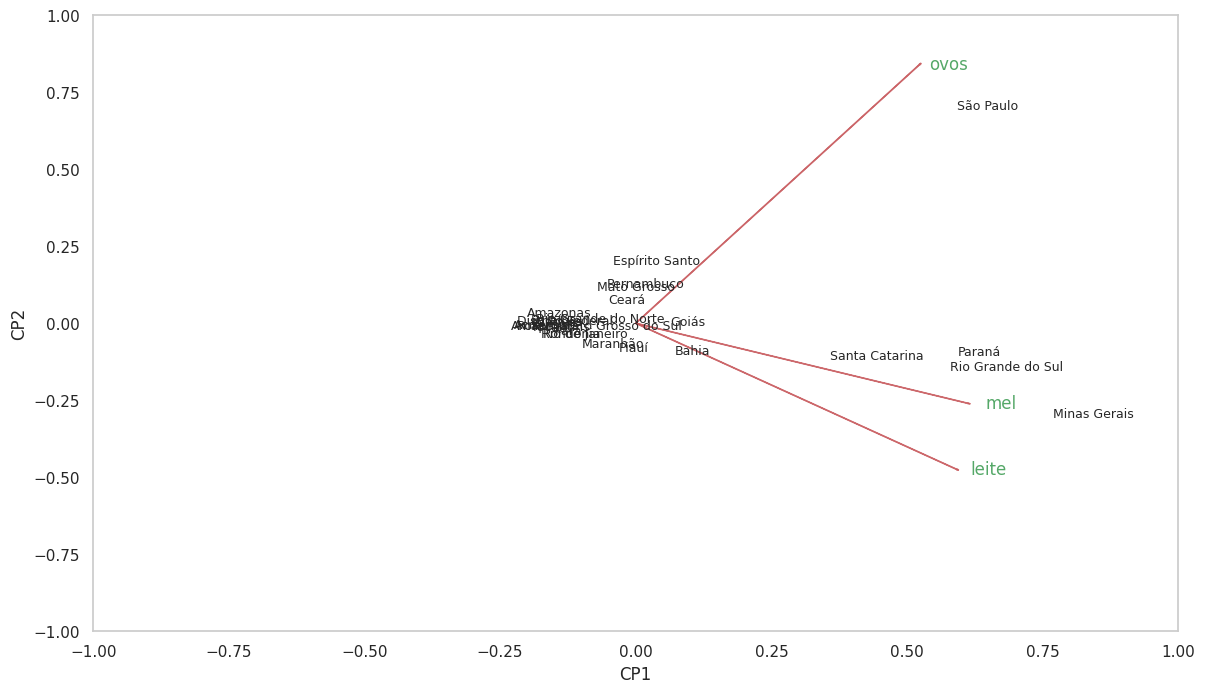

In [18]:
def biplot_names(score, coeff, labels=None, point_labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    xx = xs * scalex
    yy = ys * scaley

    if point_labels is not None:
        for i, txt in enumerate(point_labels):
            ax.annotate(txt, (xx[i], yy[i]), fontsize=9)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.8)
        if labels is None:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1, "Var"+str(i+1), color='green', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1, labels[i], color='g', ha='center', va='center')

    plt.xlabel("CP{}".format(1))
    plt.ylabel("CP{}".format(2))
    ax.set(xlim=(-1, 1), ylim=(-1, 1))
    plt.grid()

# criação do biplot com nomes nas observações
fig, ax = plt.subplots(figsize=(14, 8))
biplot_names(resultado_pca[:,0:2], np.transpose(pca.components_[0:2, :]), list(X.columns), point_labels=list(X.index))
plt.show()

In [14]:
dados.loc['São Paulo', :]

,São Paulo
leite,1692068
ovos,1020540
mel,3642739


In [15]:
dados

,leite,ovos,mel
estado,,,
Rondônia,790947,17204,89981
Acre,56870,4647,4752
Amazonas,45978,51313,33310
Roraima,13141,4572,142800
Pará,577522,32596,523999
Amapá,5983,56,11379
Tocantins,385563,20749,99313
Maranhão,371250,11060,1710718
Piauí,73518,20631,3048800
